# Week 1 - Tasks

- **Data Source:** `yfinance`
- **Assets:** `AAPL`, `MSFT`, `GOOG`, `AMZN`, `TSLA` (and `NVDA` for Task 5)
- **Timeframes:**
  * **Long Term:** `start="2015-01-01", end="2024-01-01"`
  * **Medium Term:** `start="2020-01-01", end="2024-01-01"` (Includes COVID crash)

The goal for this week is to gain familiarity with financial data, analyze common trends, learn standard library functions, and touch upon the underlying theory.

## Task 1 - Setup
* Fetch **Long Term** historical data for the 5 assets.
* Extract the `Adjusted Close` values.
    * *Note: Check for missing values or empty rows and handle them (drop or fill).*
* Use `df.describe()` to extract key summary statistics.
* Extract the **Medium Term** data as well for later tasks.

In [1]:
import yfinance as yf
import pandas as pd

tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA']
start_long = "2015-01-01"
start_med = "2020-01-01"
end_date = "2024-01-01"

data = yf.download(tickers, start=start_long, end=end_date, auto_adjust=False)

adj_close = data['Adj Close']

print("\n Missing values check:")
print(adj_close.isna().sum())

adj_close_clean = adj_close.ffill().bfill()

print(adj_close_clean.describe())

medium_term_data = adj_close_clean.loc[start_med:end_date]

print(medium_term_data.head())

[*********************100%***********************]  5 of 5 completed


 Missing values check:
Ticker
AAPL    0
AMZN    0
GOOG    0
MSFT    0
TSLA    0
dtype: int64
Ticker         AAPL         AMZN         GOOG         MSFT         TSLA
count   2264.000000  2264.000000  2264.000000  2264.000000  2264.000000
mean      81.394710    91.950540    73.063479   154.516908   102.886245
std       55.990879    48.654536    36.298158    99.658479   110.936400
min       20.604084    14.347500    24.377235    34.437157     9.578000
25%       32.814697    44.303625    41.515251    59.182487    16.670500
50%       51.220846    90.691998    59.376663   127.528805    23.160666
75%      139.017628   133.230000   104.133987   244.037392   214.290005
max      196.256577   186.570496   149.587067   377.077820   409.970001
Ticker           AAPL       AMZN       GOOG        MSFT       TSLA
Date                                                              
2020-01-02  72.468254  94.900497  67.859543  152.505646  28.684000
2020-01-03  71.763725  93.748497  67.526535  150.606705  

## Task 2 - Basic Trends
* Select **one asset** and using the **Medium Term** data, compute:
    * **Returns:** 1-day, 5-day, and 20-day simple returns.
    * **Log Returns:** 1-day, 5-day, and 20-day log returns.
    * **Volatility:** 5-day, 20-day, and 60-day rolling standard deviation (volatility) of the log returns.
* **Plotting:**
    * Plot the price and the 20-day moving average on one chart.
    * Plot the 1-day log returns on a separate chart.
    * Plot the rolling volatilities on a third chart.
    * *Analysis:* What trends do you observe? Does high volatility correlate with price drops?

* **Bonus (Long Term Data):**
    * Create a scatter plot of `|Daily Return|` vs `Volume`. Is there a relationship?
    * Group returns and volatility by **Month** (e.g., all Januaries, all Februaries) and plot the averages. Is there a "seasonal" effect?

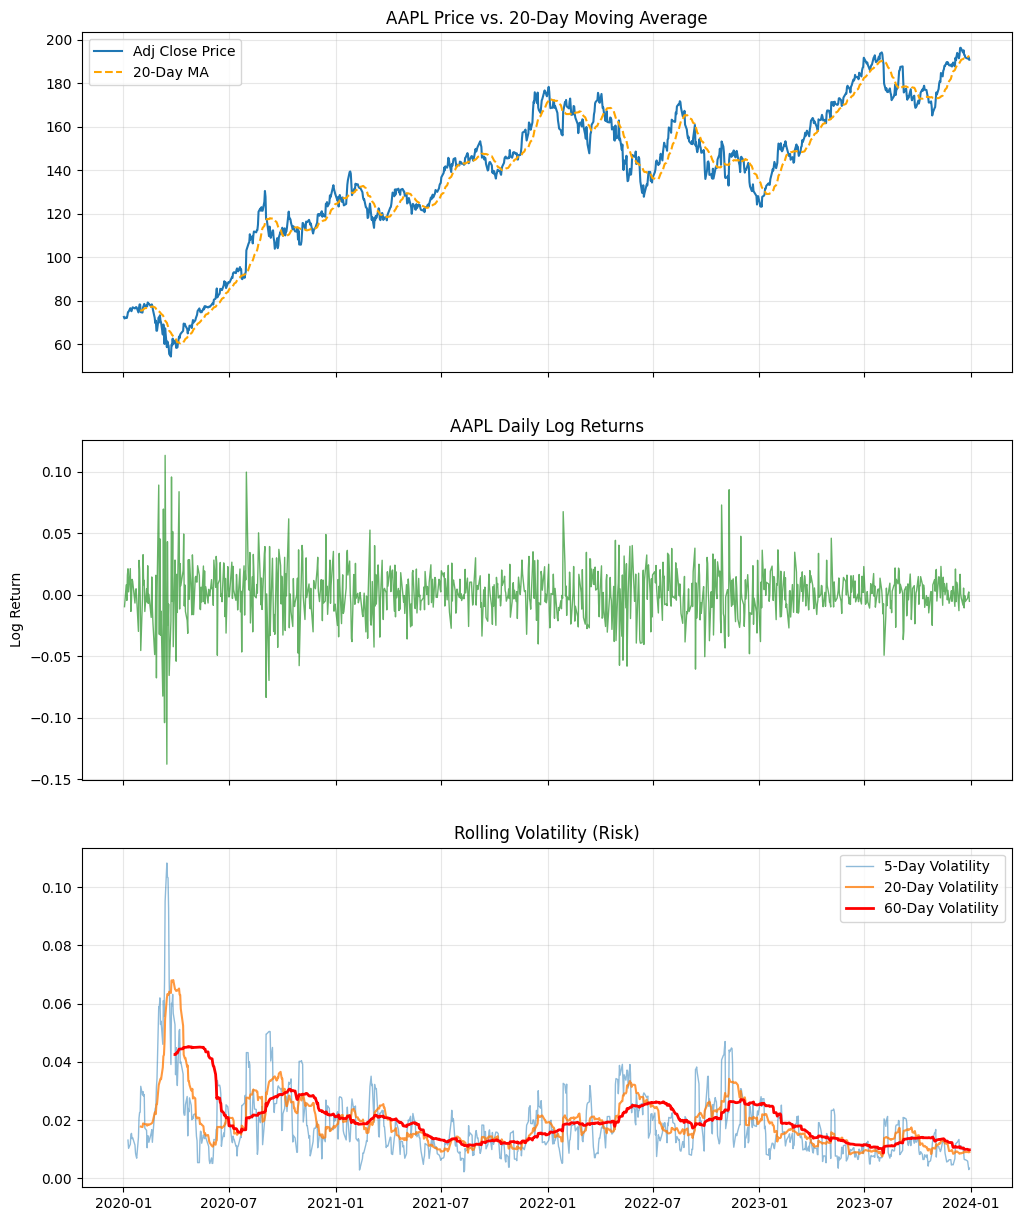

In [4]:
import numpy as np
import matplotlib.pyplot as plt

ticker = 'AAPL'
df = pd.DataFrame(medium_term_data[ticker].copy())
df.columns = ['Price']

df['Simple_Ret_1d'] = df['Price'].pct_change(1)
df['Simple_Ret_5d'] = df['Price'].pct_change(5)
df['Simple_Ret_20d'] = df['Price'].pct_change(20)

df['Log_Price'] = np.log(df['Price'])
df['Log_Ret_1d'] = df['Log_Price'].diff(1)
df['Log_Ret_5d'] = df['Log_Price'].diff(5)
df['Log_Ret_20d'] = df['Log_Price'].diff(20)

df['Vol_5d'] = df['Log_Ret_1d'].rolling(window=5).std()
df['Vol_20d'] = df['Log_Ret_1d'].rolling(window=20).std()
df['Vol_60d'] = df['Log_Ret_1d'].rolling(window=60).std()

df['MA_20d'] = df['Price'].rolling(window=20).mean()

fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

axes[0].plot(df.index, df['Price'], label='Adj Close Price', linewidth=1.5)
axes[0].plot(df.index, df['MA_20d'], label='20-Day MA', color='orange', linestyle='--')
axes[0].set_title(f'{ticker} Price vs. 20-Day Moving Average')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(df.index, df['Log_Ret_1d'], color='green', alpha=0.6, linewidth=1)
axes[1].set_title(f'{ticker} Daily Log Returns')
axes[1].set_ylabel('Log Return')
axes[1].grid(True, alpha=0.3)

axes[2].plot(df.index, df['Vol_5d'], label='5-Day Volatility', alpha=0.5, linewidth=1)
axes[2].plot(df.index, df['Vol_20d'], label='20-Day Volatility', alpha=0.8, linewidth=1.5)
axes[2].plot(df.index, df['Vol_60d'], label='60-Day Volatility', color='red', linewidth=2)
axes[2].set_title('Rolling Volatility (Risk)')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.show()

### Analysis
Based on these charts, Apple shows a clear long-term bullish trend, growing significantly from 2020 to 2024 despite some major bumps along the way. You can see the "COVID crash" right at the start where the price dips sharply below the moving average, which shows how moving averages lag behind real time action. They confirm the drop but dont predict it. The middle and bottom charts really tell the story of risk; notice how the volatility isn't random but clusters together during stress points. The red line in the bottom chart confirms that high volatility almost always aligns with price drops (like in early 2020 and 2022), while the steady, quiet periods where volatility stays low are exactly when the stock price manages its smoothest climbs.

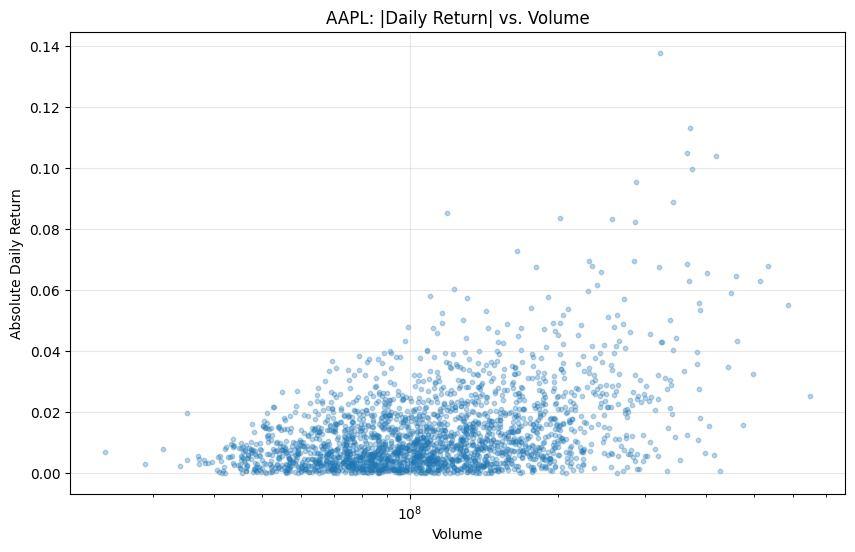

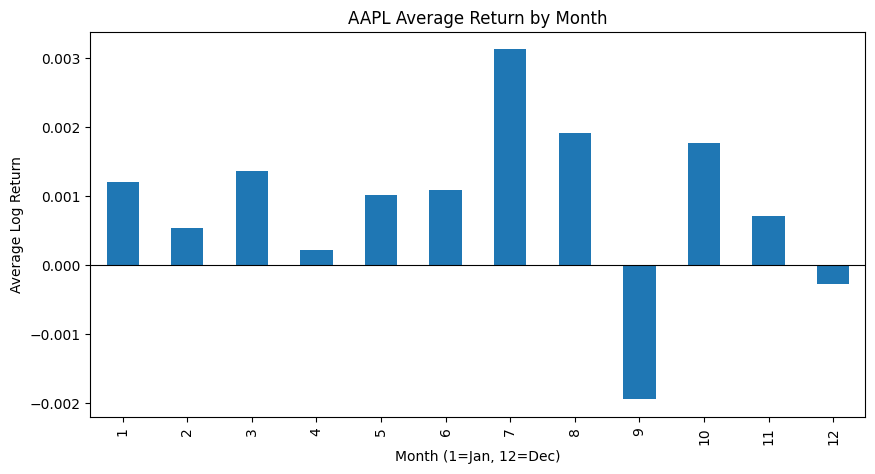

In [ ]:
# Bonus
vol_data = data['Volume'][ticker].loc["2015-01-01":"2024-01-01"]

bonus_df = pd.DataFrame()
bonus_df['Log_Ret'] = np.log(data['Adj Close'][ticker]).diff()
bonus_df['Abs_Ret'] = bonus_df['Log_Ret'].abs()
bonus_df['Volume'] = vol_data

bonus_df = bonus_df.loc["2015-01-01":"2024-01-01"].dropna()

plt.figure(figsize=(10, 6))
plt.scatter(bonus_df['Volume'], bonus_df['Abs_Ret'], alpha=0.3, s=10)
plt.title(f'{ticker}: |Daily Return| vs. Volume')
plt.xlabel('Volume')
plt.ylabel('Absolute Daily Return')
plt.xscale('log') 
plt.grid(True, alpha=0.3)
plt.show()

bonus_df['Month'] = bonus_df.index.month

seasonal_stats = bonus_df.groupby('Month')[['Log_Ret', 'Abs_Ret']].mean()
seasonal_stats['Log_Ret'].plot(kind='bar', figsize=(10, 5), title=f"{ticker} Average Return by Month")
plt.xlabel("Month")
plt.ylabel("Average Log Return")
plt.axhline(0, color='black', linewidth=0.8)
plt.show()

The bonus analysis highlights a clear link between activity and volatility, as the scatter plot shows that days with heavier trading volume consistently result in much larger price swings compared to quiet days. This intensity is matched by a distinct seasonal pattern where July emerges as the strongest month for gains, while September stands out as the only major period of negative returns, which curiously aligns with the historical market tendency to struggle as the summer ends.

## Task 3 - Stationarity
* Select **one asset** (Long Term).
* Compute the **Rolling Mean** and **Rolling Standard Deviation** of log returns with window sizes `20, 60, 120`.
* Plot them and visually inspect.
    * Does the mean stay constant? (Stationary mean)
    * Does the variance stay constant? (Stationary variance)
* Run an **Augmented Dickey-Fuller (ADF) Test** on the log return series.
    * Library: `from statsmodels.tsa.stattools import adfuller`
    * *Goal:* Interpret the p-value. The Null Hypothesis ($H_0$) is that the series is non-stationary (has a unit root). If p-value < 0.05, we reject $H_0$.
    * For learning about hypothesis testing and p-value you can refer to CS215 slides or other standard resources mentioned in READMEs.

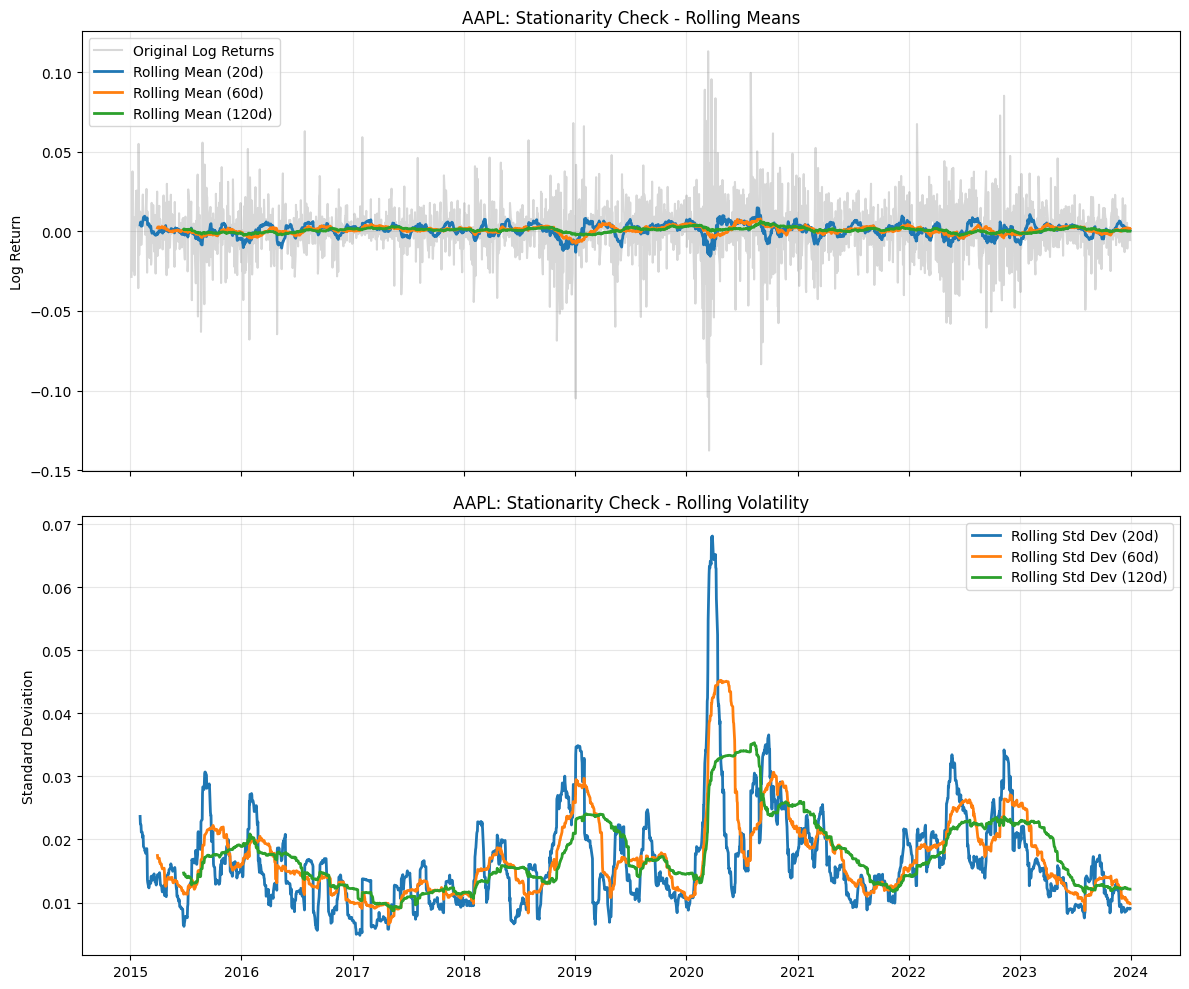


Augmented Dickey fuller Test Results (AAPL)
ADF Statistic: -14.7153
p-value:       0.0000000000

Conclusion
The p-value is < 0.05.
We REJECT the Null Hypothesis.
The time series is STATIONARY


In [7]:
from statsmodels.tsa.stattools import adfuller

ticker = 'AAPL'
prices = data['Adj Close'][ticker]

log_ret = np.log(prices).diff().dropna()

windows = [20, 60, 120]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

ax1.plot(log_ret.index, log_ret, alpha=0.3, color='gray', label='Original Log Returns')
for w in windows:
    roll_mean = log_ret.rolling(window=w).mean()
    ax1.plot(roll_mean.index, roll_mean, label=f'Rolling Mean ({w}d)', linewidth=2)

ax1.set_title(f'{ticker}: Stationarity Check - Rolling Means')
ax1.set_ylabel('Log Return')
ax1.legend()
ax1.grid(True, alpha=0.3)

for w in windows:
    roll_std = log_ret.rolling(window=w).std()
    ax2.plot(roll_std.index, roll_std, label=f'Rolling Std Dev ({w}d)', linewidth=2)

ax2.set_title(f'{ticker}: Stationarity Check - Rolling Volatility')
ax2.set_ylabel('Standard Deviation')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nAugmented Dickey fuller Test Results ({ticker})")
adf_result = adfuller(log_ret)

adf_stat = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

print(f"ADF Statistic: {adf_stat:.4f}")
print(f"p-value:       {p_value:.10f}")

print("\nConclusion")
if p_value < 0.05:
    print("The p-value is < 0.05.")
    print("We REJECT the Null Hypothesis.")
    print("The time series is STATIONARY")
else:
    print("The p-value is >= 0.05.")
    print("We cannot reject the Null Hypothesis.")
    print("The time series is NON-STATIONARY")

We can see that the rolling means stay mostly constant, however variance varies a lot.

## Task 4 - Volatility Regimes
We try to study the trend in volatility more deeply. From the ACF/PACF plot we know that volatility tends to cluster that is the market is either in a high volatility state (greater daily fluctuations) or low volatility state (stable prices, quiet markets).

Formally we can treat volatility as a *conditional standard deviation of returns*, conditioned on the history observed so far. We *cannot* predict *true* volatility for a given day based on the single return value, hence we try to estimate it using the past information. For this we look at two indicators of volatility:

1.  **Rolling Window Volatility:** Simple Moving Average (SMA) of standard deviation.
2.  **EWMA Volatility:** Exponentially Weighted Moving Average. This gives more weight to recent events. It is given by $\sigma_t^2 = (1-\lambda)r_t^2 + \lambda \sigma_{t-1}^2$.

**Steps:**
* Pick an asset and use data covering the **Feb-Mar 2020 COVID crash**.
* Compute two volatility estimates on the Log Returns:
    1.  **Rolling 20-day Volatility:** Standard deviation over a 20-day window.
    2.  **EWMA Volatility (RiskMetrics):** Use a decay factor $\lambda = 0.94$.
        * *Hint:* In pandas `df.ewm()`, the parameter `alpha` corresponds to $1 - \lambda$. So, use `alpha=0.06`.
* **Analysis:**
    * Plot both estimates on the same chart.
    * Which is smoother?
    * Which estimator reacts faster to the sudden crash in March 2020?
    * Which one would you prefer for risk management?
* **Regime Detection:** Compute the 60th percentile of your EWMA volatility series. Shade the regions on the plot where volatility exceeds this level.

* **Bonus:** A good volatility model "standardizes" the returns well. Calculate $z_t = r_t / \hat{\sigma}_t$. If the model is good, $z_t$ should have $Var \approx 1$. Check the variance of $z_t$ and plot its histogram.

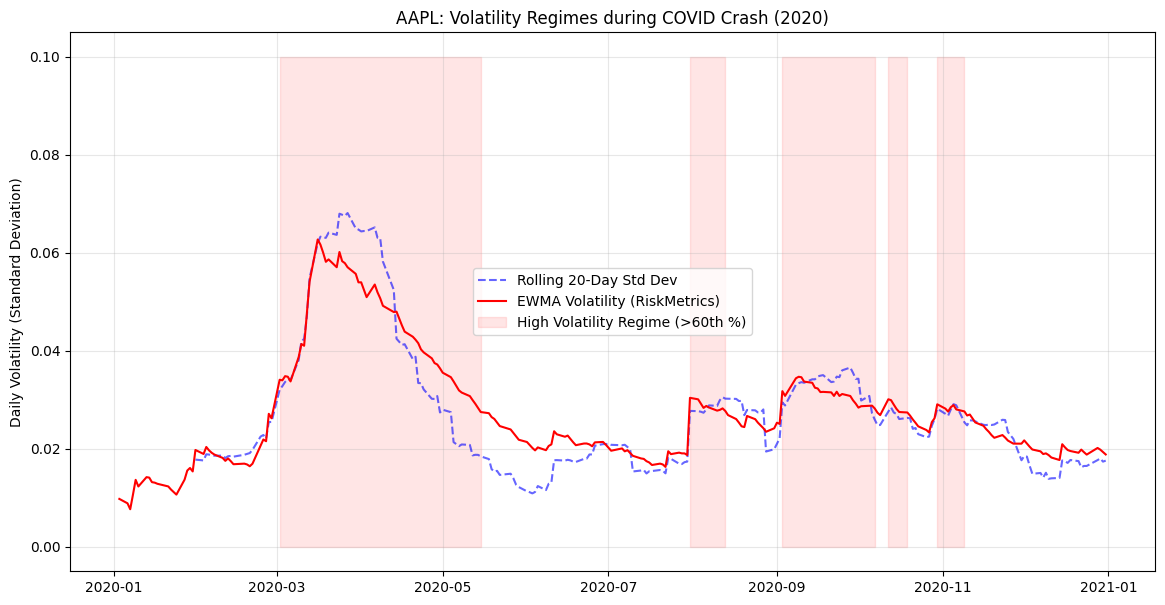

--- Bonus Analysis ---
Variance of Standardized Returns (Target ~ 1.0): 0.9246


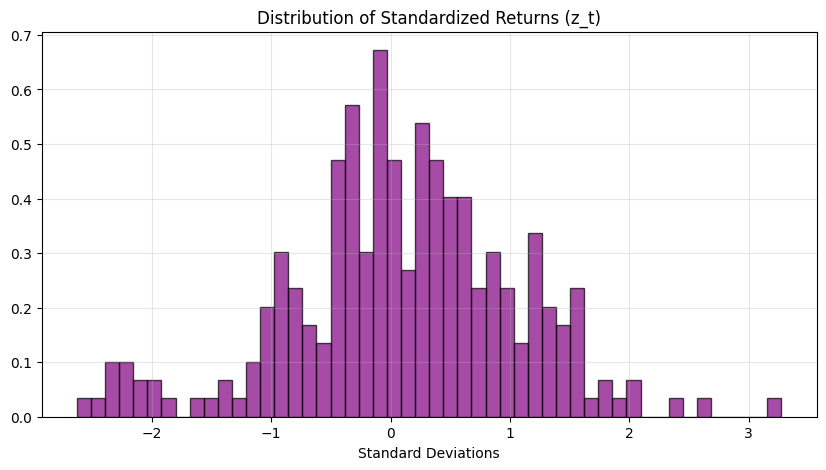

In [ ]:
ticker = 'AAPL'
prices = medium_term_data[ticker].loc["2020-01-01":"2021-01-01"] # Zoom in on 2020
log_ret = np.log(prices).diff().dropna()

vol_rolling = log_ret.rolling(window=20).std()

lambda_param = 0.94
alpha_param = 1 - lambda_param
vol_ewma = np.sqrt((log_ret**2).ewm(alpha=alpha_param).mean())

vol_threshold = vol_ewma.quantile(0.60)

plt.figure(figsize=(14, 7))

plt.plot(vol_rolling.index, vol_rolling, label='Rolling 20-Day Std Dev', 
         color='blue', alpha=0.6, linestyle='--')

plt.plot(vol_ewma.index, vol_ewma, label='EWMA Volatility (RiskMetrics)', 
         color='red', linewidth=1.5)

plt.fill_between(vol_ewma.index, 0, 0.10, 
                 where=(vol_ewma > vol_threshold), 
                 color='red', alpha=0.1, label='High Volatility Regime (>60th %)')

plt.title(f'{ticker}: Volatility Regimes during COVID Crash (2020)')
plt.ylabel('Daily Volatility (Standard Deviation)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

z_score = log_ret / vol_ewma
z_variance = z_score.var()

print(f"--- Bonus Analysis ---")
print(f"Variance of Standardized Returns (Target ~ 1.0): {z_variance:.4f}")

plt.figure(figsize=(10, 5))
plt.hist(z_score, bins=50, alpha=0.7, color='purple', edgecolor='black', density=True)
plt.title("Distribution of Standardized Returns (z_t)")
plt.xlabel("Standard Deviations")
plt.grid(True, alpha=0.3)
plt.show()

## Task 5 - Time Horizons and the "Normal" Illusion
Short-term markets are noisy and dangerous (fat tails), while long-term data looks smoother. We can prove this statistically using **Skew** and **Kurtosis**.

**Theory:**
* **Skewness:** Measures asymmetry. (Negative skew = frequent small gains, few extreme losses).
* **Kurtosis:** Measures "tailedness". (High kurtosis = frequent extreme events/crashes).
* **Normal Distribution:** Skew $\approx 0$, Kurtosis $\approx 3$ (or Excess Kurtosis $\approx 0$).

**Steps:**
1.  Take your **Long Term** data for one asset (e.g., NVDA or TSLA).
2.  Resample the prices to get **Weekly** and **Monthly** closes.
    * Use `df['Adj Close'].resample('W').last()` and `...resample('M').last()`.
3.  Compute Log Returns for all three series: Daily, Weekly, Monthly.
4.  **The Test:**
    * Calculate **Skew** and **Kurtosis** for each of the three return series.
    * *Question:* How do these values change as the time horizon increases? Do they get closer to 0 and 3?
5.  **Visualization:**
    * Plot the **Histograms** of the Daily returns vs. Monthly returns on the same plot.
    * *Tip:* You will need to standardize them (subtract mean, divide by std dev) to overlay them meaningfully.
    * *Observation:* Look at the tails. Which one has "fatter" tails (more extreme outliers)?

**Key Takeaway:**
Daily returns often violate the "Normal Distribution" assumption used in many financial models. Long-term returns fit it better. This is called *Aggregational Gaussianity*.

**Bonus:** This is a direct application of a simple yet well-known result in asymptotic statistics. Can you find out what it is and state how it explains this observation?

[*********************100%***********************]  1 of 1 completed

--- Statistics for NVDA ---
Target: Normal Dist has Skew ≈ 0, Excess Kurtosis ≈ 0
Daily   -> Skew: 0.2100 | Kurtosis: 7.5321
Weekly  -> Skew: 0.1025 | Kurtosis: 1.3913
Monthly -> Skew: -0.5604 | Kurtosis: 0.6895


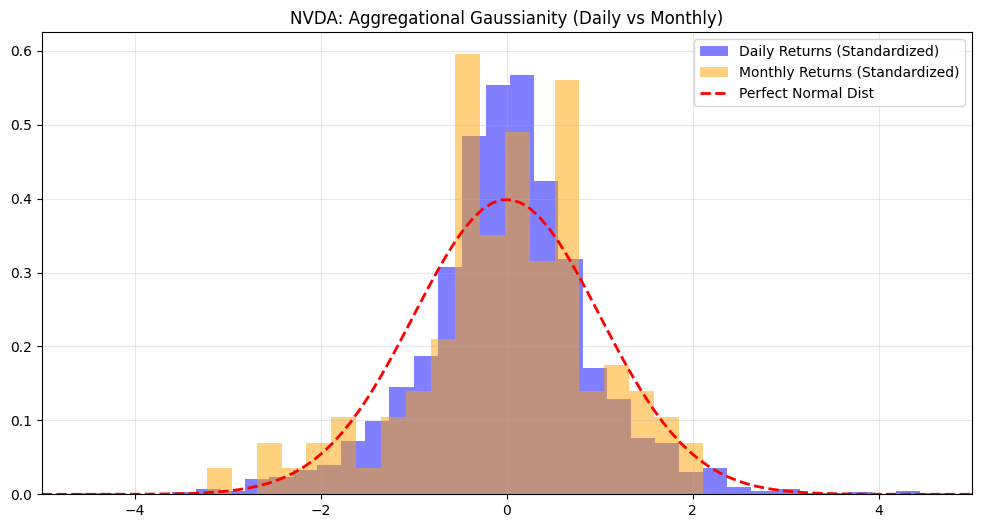

In [12]:
ticker = "NVDA"
data = yf.download(ticker, start="2015-01-01", end="2024-01-01", auto_adjust=False)

if isinstance(data.columns, pd.MultiIndex):
    prices = data['Adj Close'][ticker].dropna() 
else:
    prices = data['Adj Close'].dropna() 
    
import scipy.stats as st

ticker = 'NVDA' 

prices = data['Adj Close'][ticker].dropna()

daily_prices = prices
weekly_prices = prices.resample('W').last()
monthly_prices = prices.resample('ME').last()

daily_ret = np.log(daily_prices).diff().dropna()
weekly_ret = np.log(weekly_prices).diff().dropna()
monthly_ret = np.log(monthly_prices).diff().dropna()

def print_stats(name, series):
    skew = series.skew()
    kurt = series.kurtosis()
    print(f"{name} -> Skew: {skew:.4f} | Kurtosis: {kurt:.4f}")

print(f"--- Statistics for {ticker} ---")
print("Target: Normal Dist has Skew ≈ 0, Excess Kurtosis ≈ 0")
print_stats("Daily  ", daily_ret)
print_stats("Weekly ", weekly_ret)
print_stats("Monthly", monthly_ret)

daily_std = (daily_ret - daily_ret.mean()) / daily_ret.std()
monthly_std = (monthly_ret - monthly_ret.mean()) / monthly_ret.std()

plt.figure(figsize=(12, 6))

plt.hist(daily_std, bins=60, density=True, alpha=0.5, color='blue', label='Daily Returns (Standardized)')

plt.hist(monthly_std, bins=20, density=True, alpha=0.5, color='orange', label='Monthly Returns (Standardized)')

x = np.linspace(-5, 5, 100)
plt.plot(x, st.norm.pdf(x, 0, 1), 'r--', linewidth=2, label='Perfect Normal Dist')

plt.title(f'{ticker}: Aggregational Gaussianity (Daily vs Monthly)')
plt.xlim(-5, 5)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Observation: Notice how the Blue bars (Daily) poke out above the Red line at the edges.
This indicates 'Fat Tails' (extreme crashes happen more often than a Normal model predicts).

The statistical principle explaining this observation is the Central Limit Theorem (CLT). This theorem states that the sum (or average) of many independent random variables tends toward a Normal Distribution, even if the original variables themselves are not normally distributed. Since a monthly log return is mathematically the sum of approximately 20 daily log returns (rmonth​≈∑rdaily​), the act of aggregating them causes the extreme "fat tails" of the daily data to average out. This results in the monthly distribution looking much smoother and closer to a perfect Bell Curve, a phenomenon often called "Aggregational Gaussianity."

## Task 6 - Smart investing
Calculate how many **RTX 4090s** (approx. price $1,600$) you could afford *today* if you had invested **$1,000** in NVIDIA on the day you were born.

In [15]:
ticker = "NVDA"
birth_date = "2002-05-15" 
investment_cash = 1000 
gpu_price = 1600 

df = yf.download(ticker, start=25-6-2006, progress=False, auto_adjust=False)

initial_price = df['Adj Close'].iloc[0].item() 
current_price = df['Adj Close'].iloc[-1].item()
    
num_shares = investment_cash / initial_price
current_wealth = num_shares * current_price
    
num_gpus = current_wealth / gpu_price
    
print(f"Investment Date: {df.index[0].date()}")
print(f"Initial Price:   ${initial_price:.4f} (Split Adjusted)")
print(f"Current Price:   ${current_price:.4f}")
print(f"Shares Bought:   {num_shares:.2f}")
print(f"The $1,000 is now worth: ${current_wealth:,.2f}")
print(f"ROI (Return on Investment): {((current_wealth - 1000)/1000)*100:.2f}%")
print(f"I can buy {int(num_gpus)} NVIDIA RTX 4090s today!")

Investment Date: 1999-01-22
Initial Price:   $0.0376 (Split Adjusted)
Current Price:   $176.2900
Shares Bought:   26592.30
The $1,000 is now worth: $4,687,955.73
ROI (Return on Investment): 468695.57%
I can buy 2929 NVIDIA RTX 4090s today!
